### Import Python packages

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [386]:
# Read the dataset
lead_df = pd.read_csv('Leads.csv')

In [387]:
# Basic operations on the dataset
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [388]:
lead_df.shape

(9240, 37)

In [389]:
lead_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [390]:
# after describibg the dataset, it seems 'TotalVisits' and 'Page Views Per Visit' have some outliers

In [391]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# From the info data, we can see that the below columns have null values. We will validate this in the next section

* Page Views Per Visit
* Last Activity
* Country
* Specialization
* How did you hear about X Education
* What is your current occupation
* What matters most to you in choosing a course
* Tags
* Lead Quality
* Lead Profile
* City
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score       

In [392]:
# First let's check the columns that have 'Select' values. This means that the customer
# did not slect any option while filling the form.
# Customers/Leads did not select the option probably the relevant option was not availabole or the leads were 
# students.
select_col = []
for col in lead_df.columns:
    if 'Select' in lead_df[col].values:
        select_col.append(col)
print(f'The categorical columns having "Select" value are: \n{select_col} \n')

The categorical columns having "Select" value are: 
['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'] 



**Insights**:
The categorical columns having "Select" value are:
* Specialization
* How did you hear about X Education
* Lead Profile
* City

Let's replace the 'Select' values in these columns with null values

In [393]:
# Impute categorical columns having 'Select' with NaN
lead_df = lead_df.replace('Select', np.nan)

In [394]:
# Let's validate if the 'Select' values are imputed
select_col = []
for col in lead_df.columns:
    if 'Select' in lead_df[col].values:
        select_col.append(col)
print(f'The categorical columns having "Select" value are: \n{select_col} \n')

The categorical columns having "Select" value are: 
[] 



In [395]:
# Let's check the percentage of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# The columns where the null value percentage is above 40%, we'll be deleting those columns
Delete the below columns
* Lead Quality
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score 
* Asymmetrique Profile Score  

In [396]:
lead_columns = lead_df.columns

for col in lead_columns:
    if lead_df[col].isnull().sum()/len(lead_df)*100 > 40:
        lead_df.drop(col, axis=1, inplace=True)

In [397]:
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# The columns that have very less or negligible null values, we'll remove those rows
Remove the null value rows for the below columns
* Lead Source
* TotalVisits
* Page Views Per Visit
* Last Activity

In [398]:
# Prospect ID and Lead Number are just ID's for the different customer. They do not add any value to the analysis and hence can be dropped

lead_df.drop(columns=['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [399]:
# Let's check the dataset
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [400]:
# Checking columns with one unique value and dropping them as they will not affect our analysis
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [401]:
# We can see that there are columns with just one value, we will drop thoes columns.

In [402]:
lead_columns = lead_df.columns

for col in lead_columns:
    if lead_df[col].nunique() == 1:
        lead_df.drop(col, axis=1, inplace=True)

In [403]:
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

We'll have to impute the null values for the below columns

* Country
* Specialization
* How did you hear about X Education
* What is your current occupation
* What matters most to you in choosing a course
* Tags
* Lead Profile
* City

In [404]:
# let's check the dataset
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [405]:
lead_columns = lead_df.columns

null_value_15 = []
for col in lead_columns:
    if lead_df[col].isnull().sum()/len(lead_df)*100 > 15:
        null_value_15.append(col)
        
print(null_value_15)

['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']


In [406]:
def value_count_and_plot_graph(col):
    print(f'******************************************************************************************** \n')
    print(f'{lead_df[col].value_counts(normalize=True, dropna=False)*100} \n')
    plt.figure(figsize=(15,5))
    sns.countplot(x=lead_df[col], hue=lead_df.Converted)
    plt.xticks(rotation=90)
    plt.show()

******************************************************************************************** 

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China        

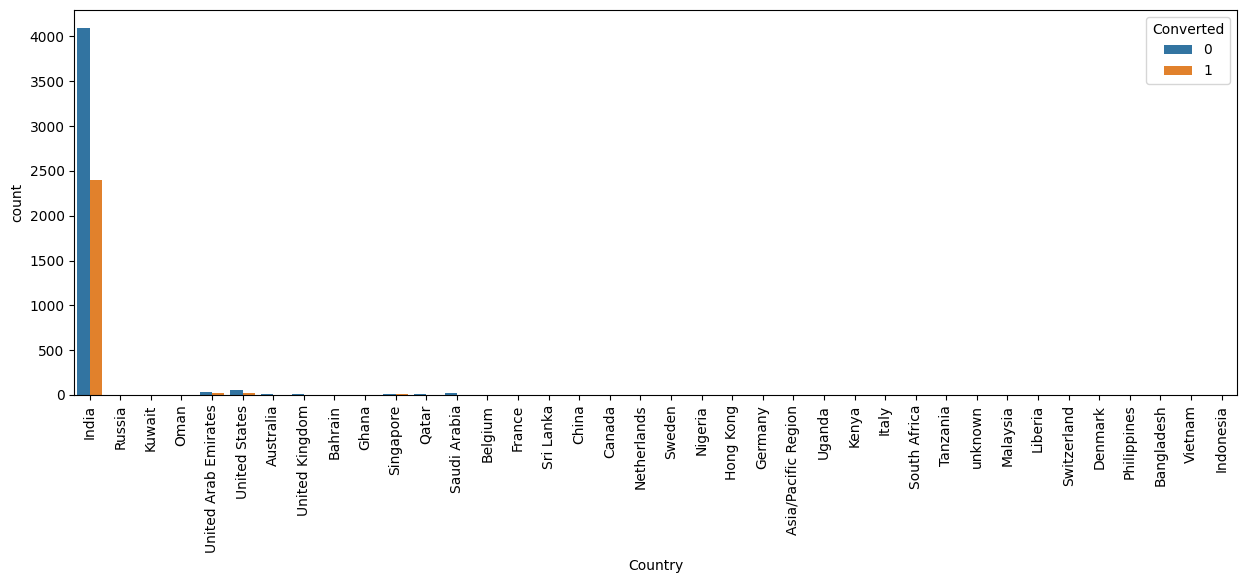

In [407]:
# For columns wherein the null value percentage is greater than 15%, we will start checking them.
# Let's start analysing country

value_count_and_plot_graph('Country')

**Insights:**

As we can see that both India and NaN together make up ~96% of the data. This is a highly skewed data and hence this column will not contribute much to the analysis, this column can be dropped.

In [408]:
col_to_drop = ['Country']

******************************************************************************************** 

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.4329

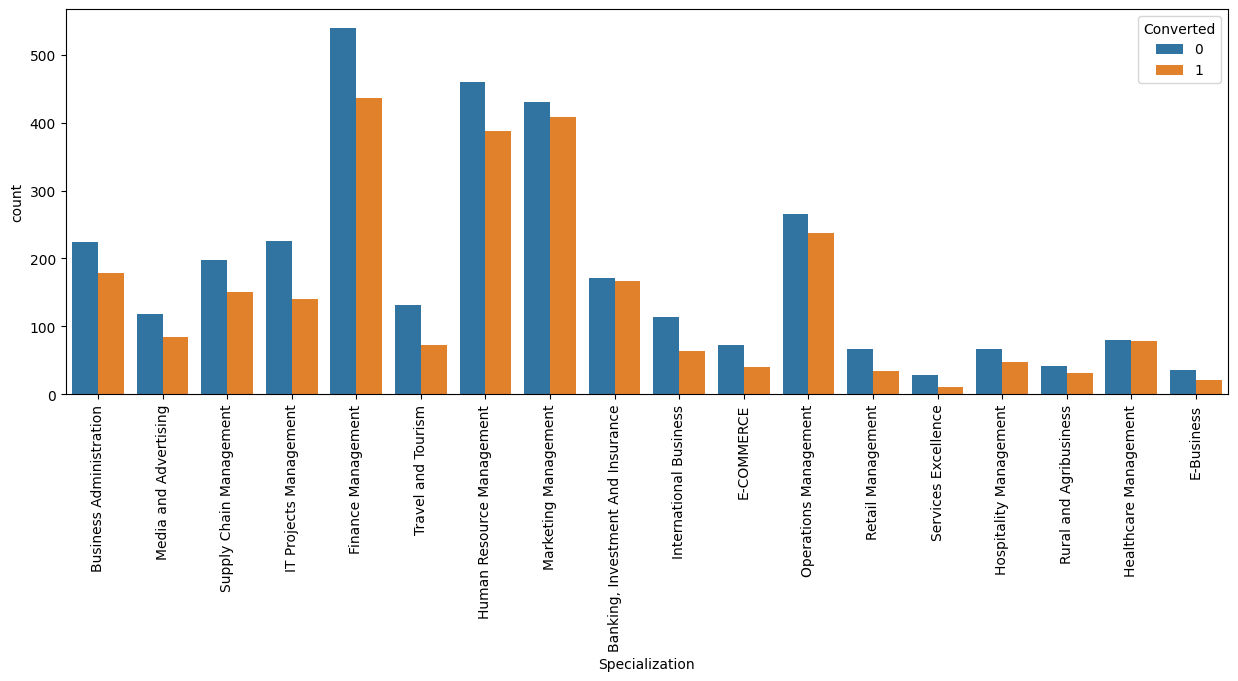

In [409]:
# Let's check the column 'Specialization'
value_count_and_plot_graph('Specialization')

**Insights**:
* We can see that management leads are higher in number. They are also among the most converted ones
  

In [410]:
# Let's categorize the specilization into three broad categories

# Combining  Management Speciliazations:
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Finance Management', 'Human Resource Management', 'Marketing Management', 
     'Operations Management', 'IT Projects Management', 'Supply Chain Management', 
     'Healthcare Management', 'Hospitality Management', 'Retail Management'], 
    'Marketing Specialization')

# Combining Administration Specializations
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Business Administration', 'International Business', 'Rural and Agribusiness', 
     'E-Business'], 'Administration Specialization')

# Combining Industry Specializations
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Banking, Investment And Insurance', 'Travel and Tourism', 
     'Media and Advertising', 'E-COMMERCE', 'Services Excellence'], 'Industry Specialization')

******************************************************************************************** 

Specialization
Marketing Specialization         46.028139
NaN                              36.580087
Industry Specialization           9.696970
Administration Specialization     7.694805
Name: proportion, dtype: float64 



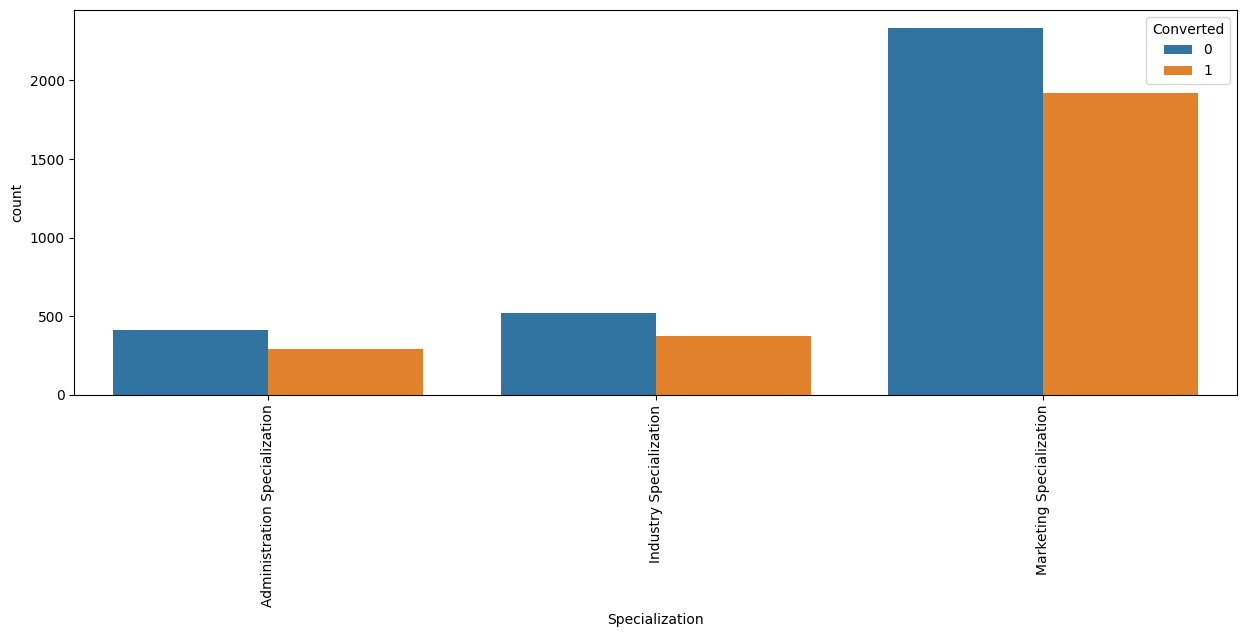

In [411]:
# Let's check the column 'Specialization' after combining the specializations
value_count_and_plot_graph('Specialization')

******************************************************************************************** 

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64 



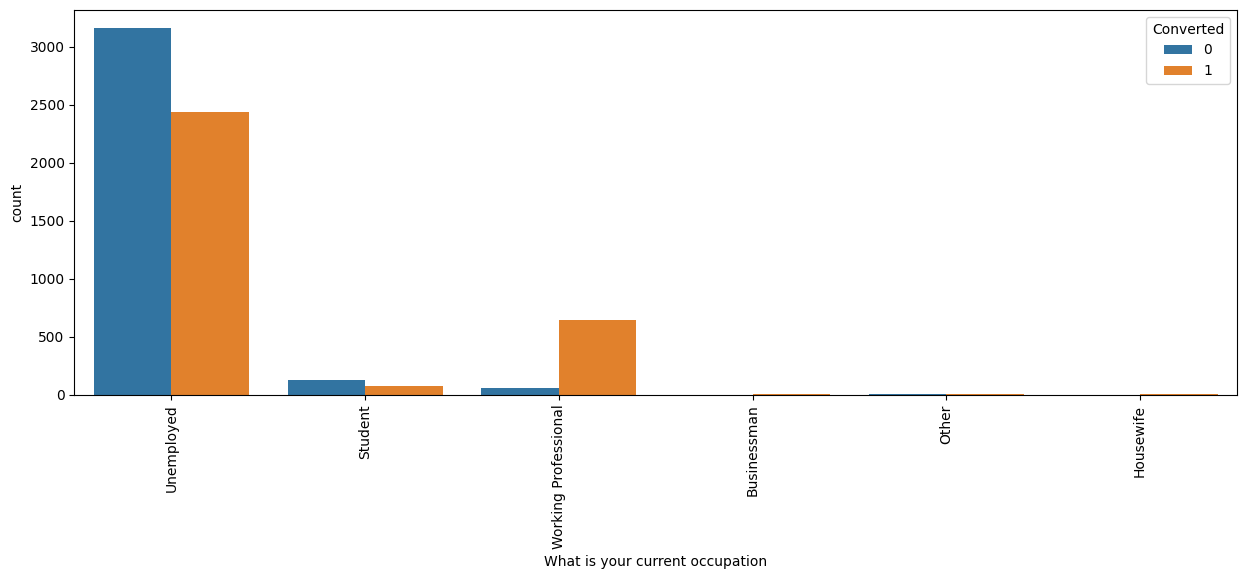

In [413]:
# Let's check the column 'How did you hear about X Education'
value_count_and_plot_graph('What is your current occupation')

In [423]:
mode = lead_df['What is your current occupation'].mode()
mode

0    Unemployed
Name: What is your current occupation, dtype: object

In [429]:
# Let's impute the NaN values with the mode i.e 'Unemployed'

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

******************************************************************************************** 

What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64 



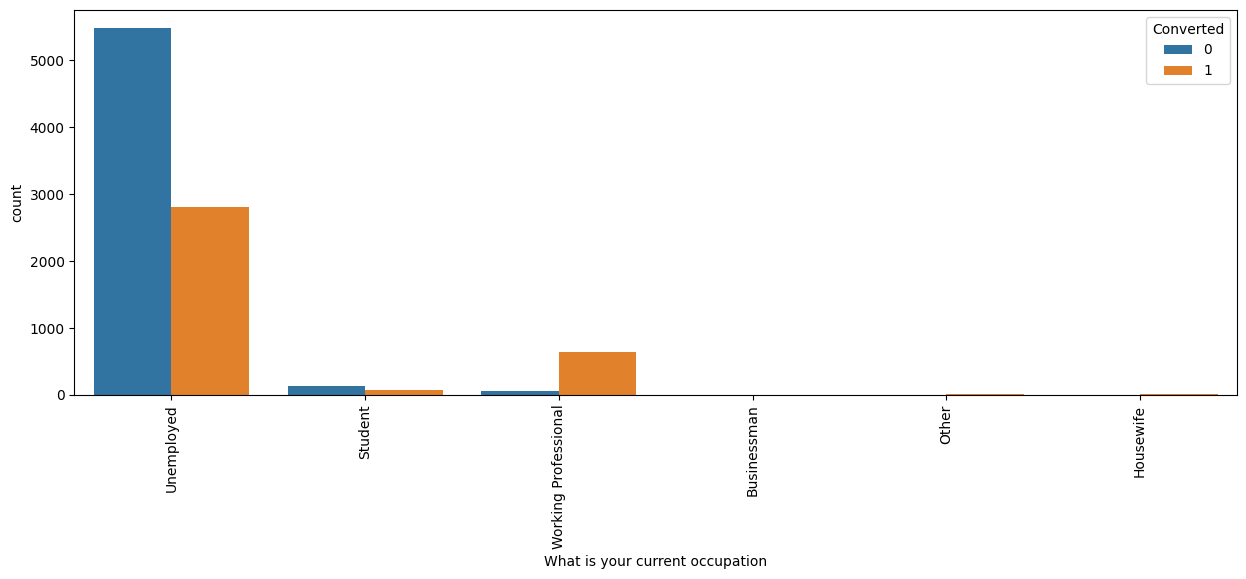

In [430]:
# Let's check the value count and countplot after imputation
value_count_and_plot_graph('What is your current occupation')

**Insights**:
* 'Unemployed' leads has the highest count
* 'Working Professional' leads have the highest chance of joining the course

******************************************************************************************** 

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64 



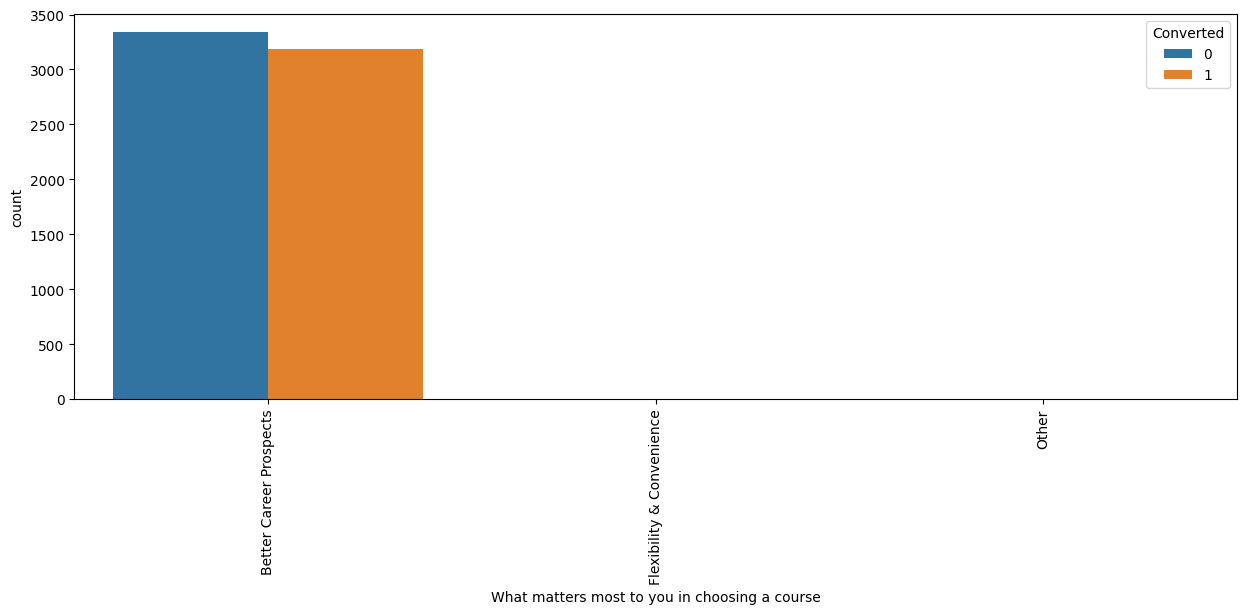

In [431]:
# Let's check the column 'What matters most to you in choosing a course'
value_count_and_plot_graph('What matters most to you in choosing a course')

In [432]:
# Let's check the mode for column 'What matters most to you in choosing a course'
mode = lead_df['What matters most to you in choosing a course'].mode()
print(mode)

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object


In [433]:
# Let's impute NaN with the mode of the column
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

******************************************************************************************** 

What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64 



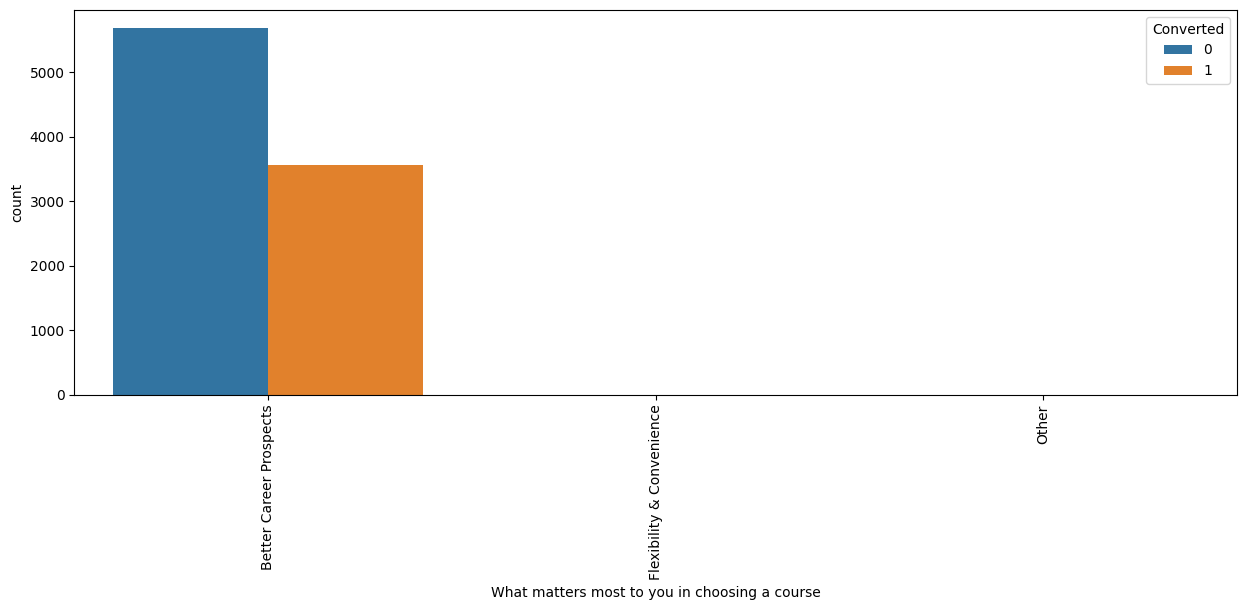

In [434]:
# Let's check the value count and countplot after imputation
value_count_and_plot_graph('What matters most to you in choosing a course')

**Insights:**

As we can see that 'Better Career Prospects' make up ~99.9% of the data. This is a highly skewed data and hence this column will not contribute much to the analysis, this column can be dropped. We'll be adding to the columns to be dropped list.

In [435]:
# Appending 'What matters most to you in choosing a course' column to columns to be dropped list
col_to_drop.append('What matters most to you in choosing a course')

******************************************************************************************** 

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given

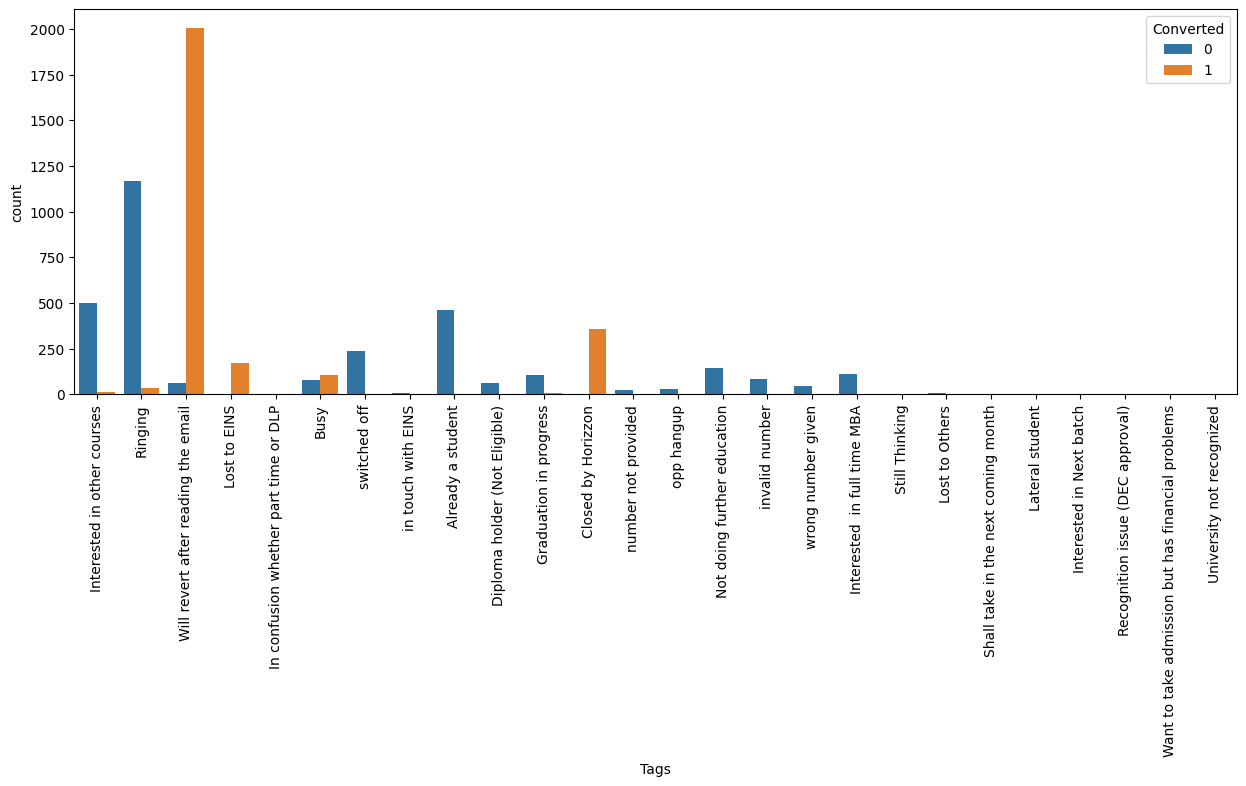

In [437]:
# Let's check the column 'Tags'
value_count_and_plot_graph('Tags')

In [438]:
# Let's imput the NaN with 'Not Specified'
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Not Specified')

******************************************************************************************** 

Tags
Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given

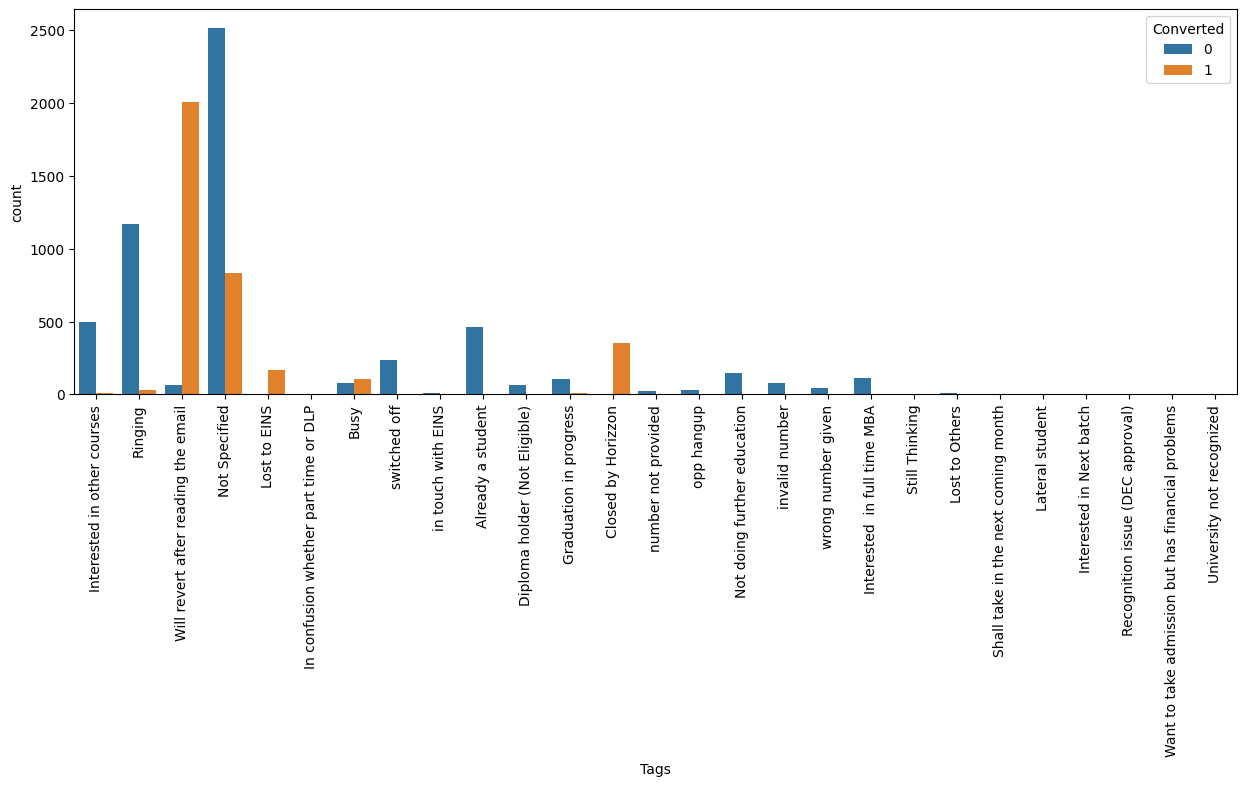

In [439]:
# Let's check the value count and plot again
value_count_and_plot_graph('Tags')

In [440]:
# Let's add all low value count tags to a single tag 'Others'
lead_df['Tags'] = lead_df['Tags'].replace(
    ['Interested in other courses', 'In confusion whether part time or DLP', 
     'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 
     'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 
     'Want to take admission but has financial problems', 'Interested in Next batch', 
     'Lateral student', 'Shall take in the next coming month', 'University not recognized', 
     'Recognition issue (DEC approval)', 'Already a student', 'switched off', 
     'Not doing further education', 'Interested  in full time MBA', 
     'Graduation in progress'], 'Others')

******************************************************************************************** 

Tags
Not Specified                          36.287879
Will revert after reading the email    22.424242
Others                                 20.487013
Ringing                                13.019481
Closed by Horizzon                      3.874459
Busy                                    2.012987
Lost to EINS                            1.893939
Name: proportion, dtype: float64 



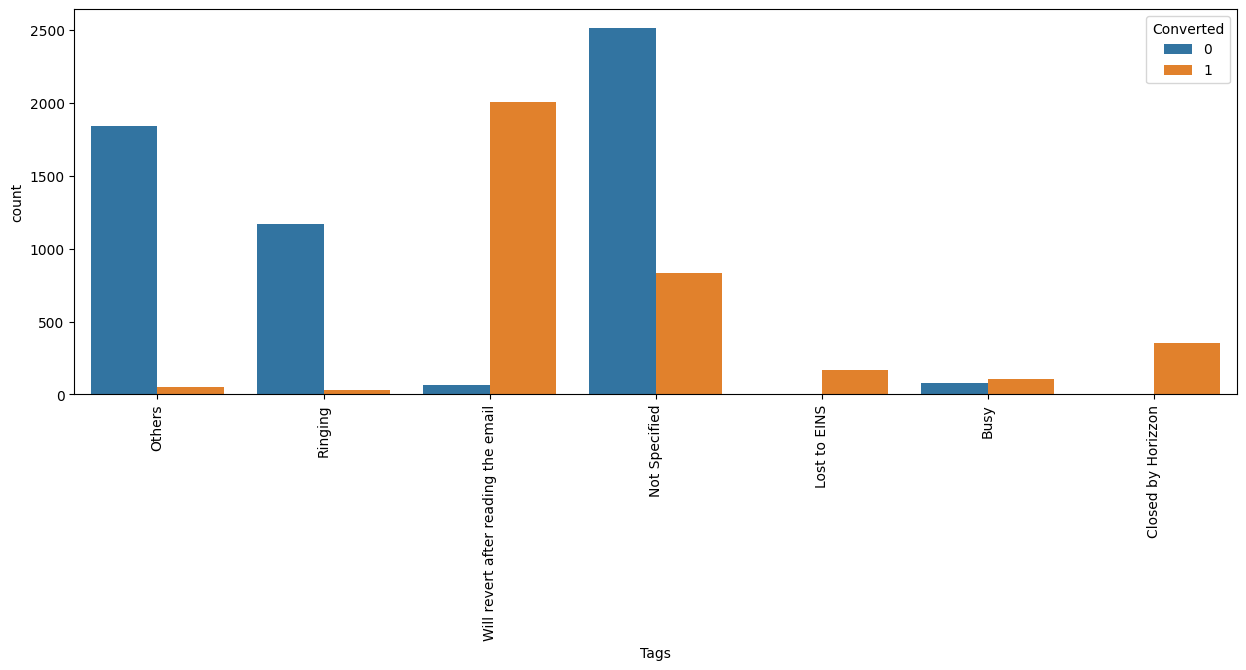

In [441]:
# Let's check the value counts and countplot after ategorizing the values
value_count_and_plot_graph('Tags')

******************************************************************************************** 

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 



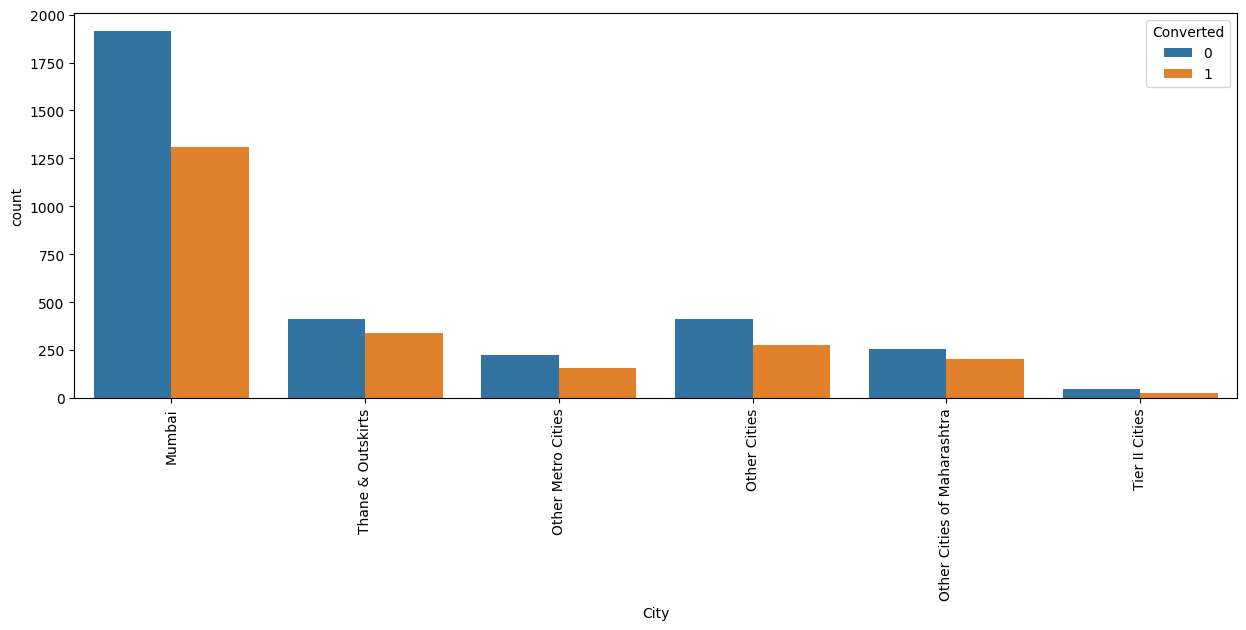

In [442]:
# Let's check the column 'City'
value_count_and_plot_graph('City')

In [443]:
# Check mode for 'City' column
mode = lead_df['City'].mode()
mode

0    Mumbai
Name: City, dtype: object

In [444]:
# Let's replace NaN values in City column with the mode i.e Mumbai
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

******************************************************************************************** 

City
Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 



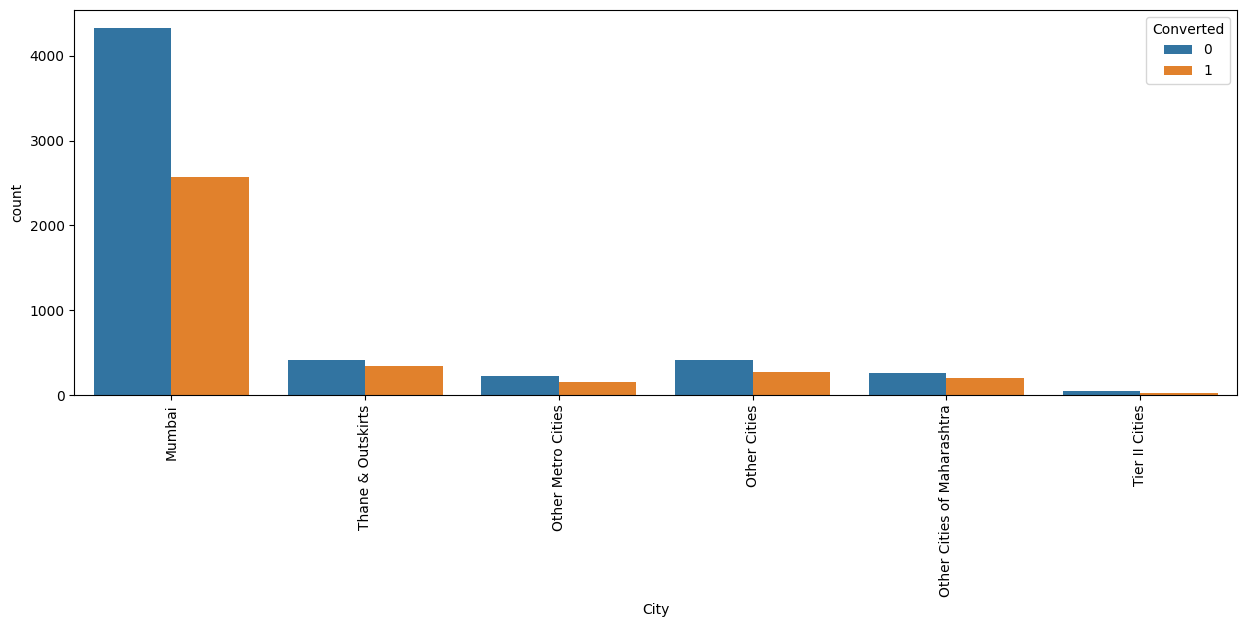

In [445]:
# Let's check the value count and countplot after imputing the NaN values
value_count_and_plot_graph('City')

**Insights:**
* Highest converted leads is from Mumbai

In [448]:
# Let's check the null values at this stage
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re